In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv("/content/takehome_users.csv",encoding='ISO-8859-1')
df1.head()   

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [ ]:
df1.shape

In [4]:
df2=pd.read_csv("/content/takehome_user_engagement.csv")
df2.head()
     

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
df2.shape

(207917, 3)

In [6]:
df1.rename(columns={'object_id':'user_id'},inplace=True)

In [7]:
data= pd.merge(df1,df2,on='user_id',how='right')

In [8]:
data.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'time_stamp', 'visited'],
      dtype='object')

In [9]:
data['date'] = data['time_stamp'].astype('datetime64')
data['week'] = data['date'].dt.isocalendar().week
data['year'] = data['date'].dt.isocalendar().year
data['month'] =data['date'].dt.month

In [10]:
data.head(3)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited,date,week,year,month
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1,2014-04-22 03:53:30,17,2014,4
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1,2013-11-15 03:45:04,46,2013,11
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1,2013-11-29 03:45:04,48,2013,11


In [11]:
groupby_week = data.groupby(['user_id','week','month','year'])['visited'].count().reset_index()
groupby_week.head()

,user_id,week,month,year,visited
0,1,17,4,2014,1
1,2,1,12,2014,1
2,2,2,1,2014,1
3,2,6,2,2014,3
4,2,7,2,2014,2


In [12]:
adopted_user = groupby_week.loc[groupby_week['visited'] >=3]
len(adopted_user)

32754

In [13]:
groupby_week['adopted_user'] = groupby_week['visited'].apply(lambda x: 1 if x >= 3 else 0)
groupby_week.head()
     

,user_id,week,month,year,visited,adopted_user
0,1,17,4,2014,1,0
1,2,1,12,2014,1,0
2,2,2,1,2014,1,0
3,2,6,2,2014,3,1
4,2,7,2,2014,2,0


In [14]:
df3 = groupby_week[(groupby_week['visited']>=3)].value_counts()
df3
     

user_id  week  month  year  visited  adopted_user
2        6     2      2014  3        1               1
7926     10    3      2014  7        1               1
         19    5      2014  4        1               1
                      2013  5        1               1
         18    5      2014  4        1               1
                                                    ..
4022     1     1      2013  6        1               1
4019     52    12     2013  7        1               1
                      2012  6        1               1
         51    12     2013  7        1               1
11988    21    5      2014  5        1               1
Length: 32754, dtype: int64

In [15]:
data.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'time_stamp', 'visited', 'date', 'week', 'year', 'month'],
      dtype='object')

In [16]:
data.dtypes

user_id                                int64
creation_time                         object
name                                  object
email                                 object
creation_source                       object
last_session_creation_time           float64
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
time_stamp                            object
visited                                int64
date                          datetime64[ns]
week                                  UInt32
year                                  UInt32
month                                  int64
dtype: object

In [17]:
data["opted_in_to_mailing_list"].value_counts()

0    154246
1     53671
Name: opted_in_to_mailing_list, dtype: int64

<AxesSubplot:ylabel='creation_source'>

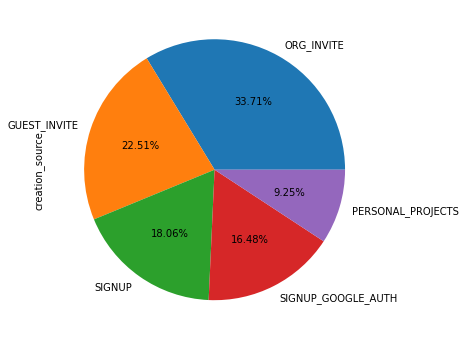

In [18]:
data["creation_source"].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(10,6))

From the pie diagram, we can conclude that the org_invite feature is contributing the most i.e 33.17%

# Relation between categorical Columns

opted_in_to_mailing_list     0     1
creation_source                     
GUEST_INVITE              2742   875
ORG_INVITE                3226  1115
PERSONAL_PROJECTS          305    99
SIGNUP                    1701   582
SIGNUP_GOOGLE_AUTH        1032   323


Text(0, 0.5, 'opted_in_to_mailing_list')

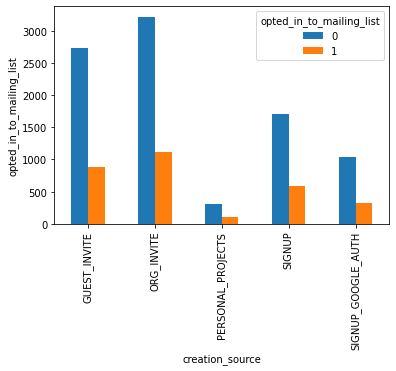

In [19]:
import scipy.stats as stats
c= pd.crosstab(data["creation_source"],df1["opted_in_to_mailing_list"])
print(c)
stats.chi2_contingency(c)
c.plot(kind="bar")
plt.ylabel("opted_in_to_mailing_list")

Majority opted into mailing list is from the Org_invite

enabled_for_marketing_drip     0    1
creation_source                      
GUEST_INVITE                3079  538
ORG_INVITE                  3675  666
PERSONAL_PROJECTS            338   66
SIGNUP                      1948  335
SIGNUP_GOOGLE_AUTH          1168  187


Text(0, 0.5, 'enabled_for_marketing_drip')

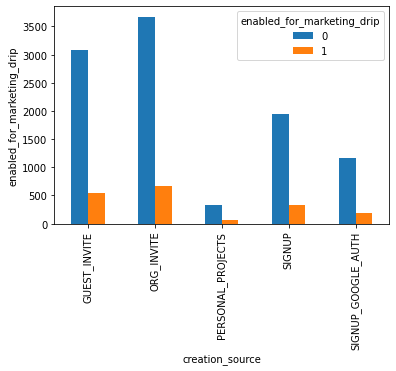

In [20]:
import scipy.stats as stats
c= pd.crosstab(data["creation_source"],df1["enabled_for_marketing_drip"])
print(c)
stats.chi2_contingency(c)
c.plot(kind="bar")
plt.ylabel("enabled_for_marketing_drip")

Enabled for marketing drip contributes lesser towards all categories than the opted n to mailing list

adopted_user            0      1
creation_source                 
GUEST_INVITE         9691   6797
ORG_INVITE          14607  11421
PERSONAL_PROJECTS    3679   2629
SIGNUP               9286   7099
SIGNUP_GOOGLE_AUTH   5916   4808


Text(0, 0.5, 'adopted_user')

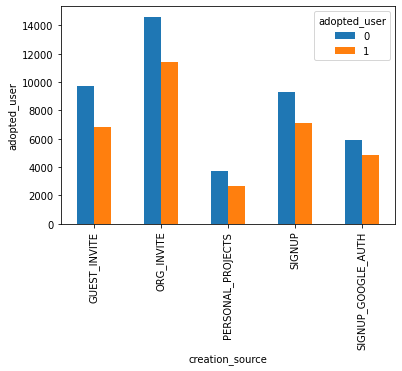

In [21]:
import scipy.stats as stats
c= pd.crosstab(data["creation_source"],groupby_week['adopted_user'])
print(c)
stats.chi2_contingency(c)
c.plot(kind="bar")
plt.ylabel("adopted_user")

adopted and not adopeted are moreover equally distributed from all categories

Relation between Categorical and Continuous columns

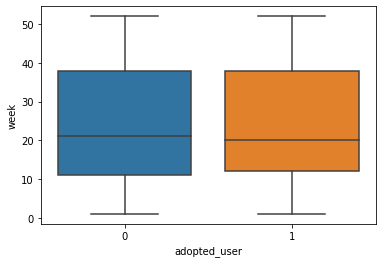

In [22]:
week_0=groupby_week[groupby_week['adopted_user']==0]["week"]
week_1=groupby_week[groupby_week['adopted_user']==1]["week"]
sns.boxplot(x='adopted_user',y="week",data=groupby_week)
plt.show()

Adopeted users mostly range from week 11 to week 38

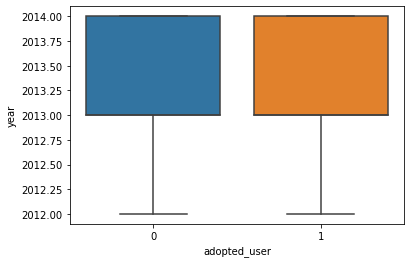

In [23]:
year_0=groupby_week[groupby_week['adopted_user']==0]["year"]
year_1=groupby_week[groupby_week['adopted_user']==1]["year"]
sns.boxplot(x='adopted_user',y="year",data=groupby_week)
plt.show()


Adopted users are between 2013 to 2014

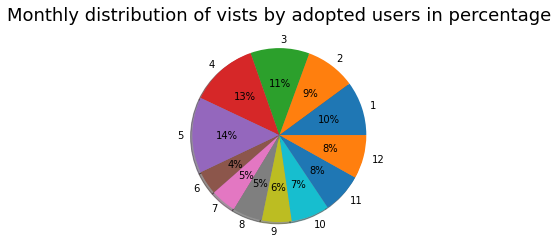

In [32]:
q = df3.groupby(['month']).size().values
p = df3.groupby(['month']).size().index
y = np.array(q)
x = np.array(p)
plt.pie(y, labels = x, autopct='%1.0f%%',shadow=True)
plt.title("Monthly distribution of vists by adopted users in percentage",fontsize=18)
plt.show()

The most adopted user is from the 5th month with 14%

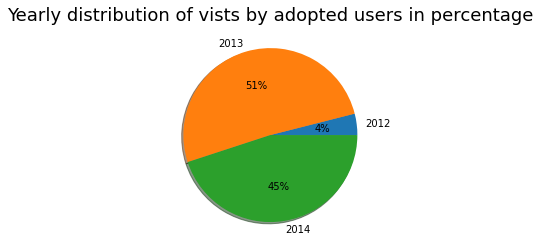

In [30]:
q = df3.groupby(['year']).size().values
p = df3.groupby(['year']).size().index
y = np.array(q)
x = np.array(p)
plt.pie(y, labels = x, autopct='%1.0f%%',shadow=True)
plt.title("Yearly distribution of vists by adopted users in percentage", fontsize=18)
plt.show()

the most adopted user is from the year 2013

No of Times visited based on week,month and year

Text(0.5, 1.0, 'Number of times visited based on the week,month and year')

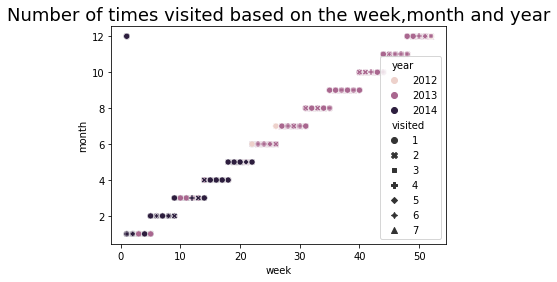

In [31]:
sns.scatterplot(groupby_week['week'],groupby_week['month'],groupby_week['year'],groupby_week['visited'])
plt.title("Number of times visited based on the week,month and year",fontsize=18)
     

From this we can conclude that most of the users visted in 2013 after 20 weeks time

Adopted users based on year, month and week

Text(0.5, 1.0, 'Adopted users based on year, month and week')

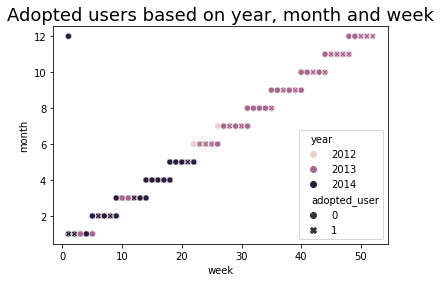

In [33]:
sns.scatterplot(groupby_week['week'],groupby_week['month'],groupby_week['year'],groupby_week['adopted_user'])
plt.title("Adopted users based on year, month and week",fontsize=18)

The adopted users are mostly from the year 2013 and from the months of 11 and 12